<a href="https://colab.research.google.com/github/MukeshSiddh/ML-AME/blob/main/Finance_dta_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finance Data Project

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

You can dowload the historical data from the online site **Yahoo finance** and upload to colab to use it!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: In Cell next to this one there are the steps to get the data.*

### The Imports

Already filled out for you.

In [ ]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data from Yahoo Finance. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

**Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Go to Yahoo Finance and search for the bank.
2. Download the Historical data for the given time.
3. Upload the data in the colab and read it using pd.read_csv().

    
    # Bank of America
    BAC = pd.read_csv('Bank_of_America.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
BAC=pd.read_csv('/content/drive/MyDrive/BAC.csv').set_index('Date')
C=pd.read_csv('/content/drive/MyDrive/C.csv').set_index('Date')
GS = pd.read_csv('/content/drive/MyDrive/GS.csv').set_index('Date')
JPM = pd.read_csv('/content/drive/MyDrive/JPM.csv').set_index('Date')
MS = pd.read_csv('/content/drive/MyDrive/MS.csv').set_index('Date')
WFC = pd.read_csv('/content/drive/MyDrive/WFC.csv').set_index('Date')

In [ ]:
bs.index.names = ['Date']

In [ ]:
bs.columns.names = ['Bank Ticker','Stock Info']
bs.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  33.170311  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  32.818047  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  32.860317  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  32.810982  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  32.832123  15619400   

Bank Ticker           C                                                  \
Stock Info         Open        High         Low       Close   Adj Close   
Date                                                                      
2006-01-03   490.000000  493.799988  481.100006  492.899994  354.033600   
2006-01-04   488.600006  491.000000  483.500000  483.799988  347.497467   
2006-01-05   484.399994  487.799988  484.000000  486.200012  349.221191   
2006-01-06   488.799988  489.000000  482.000000  486.200012  349.221191   
2006-01-09   486.000000  487.399994  483.000000  483.899994  347.569153   

Bank Ticker           
Stock Info    Volume  
Date                  
2006-01-03   1537600  
2006-01-04   1870960  
2006-01-05   1143160  
2006-01-06   1370210  
2006-01-09   1680740

In [ ]:
bs.index.name

'Date'

**Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

*You may check the below given dataframe to figure out whatever is demanded.*
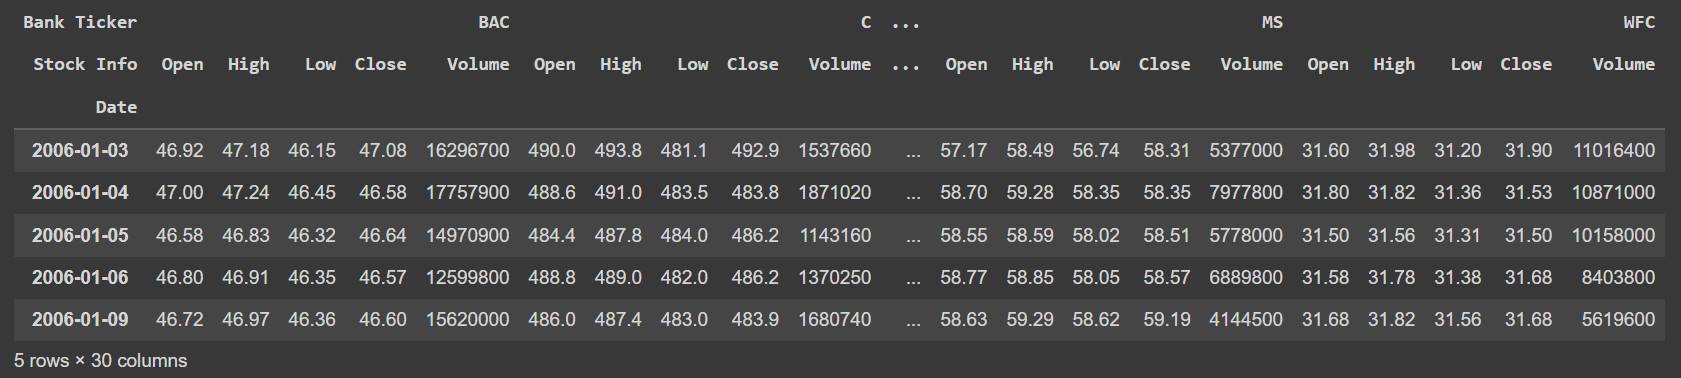

In [ ]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

**Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [ ]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers,names=['Bank Ticker','Stock Info'])

**Set the column name levels (this is filled out for you):**

In [ ]:
#bank_stocks.columns.names = ['Bank Ticker','Stock Info']

**Check the head of the bank_stocks dataframe.**

In [ ]:
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  33.170311  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  32.818047  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  32.860317  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  32.810982  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  32.832123  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  34.886635  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  34.910564  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  35.006298  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  35.042202  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  35.413143  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  19.975798  11016400  
2006-01-04   31.530001  19.744102  10870000  
2006-01-05   31.495001  19.722191  10158000  
2006-01-06   31.680000  19.838036   8403800  
2006-01-09   31.674999  19.834902   5619600  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! We want you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).


**What is the max Close price for each bank's stock throughout the time period?**

In [ ]:
bank_stocks.xs('Close', level='Stock Info', axis = 1).max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [ ]:
bank_stocks.xs('Open',level='Stock Info',axis=1).max()

Bank Ticker
BAC     55.040001
C      566.000000
GS     243.550003
JPM     70.190002
MS      90.769997
WFC     58.730000
dtype: float64

**Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [ ]:
returns = pd.DataFrame()

# **We can use pandas pct_change() method or any other method you prefer on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [ ]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


**Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

In [ ]:
import seaborn as sns


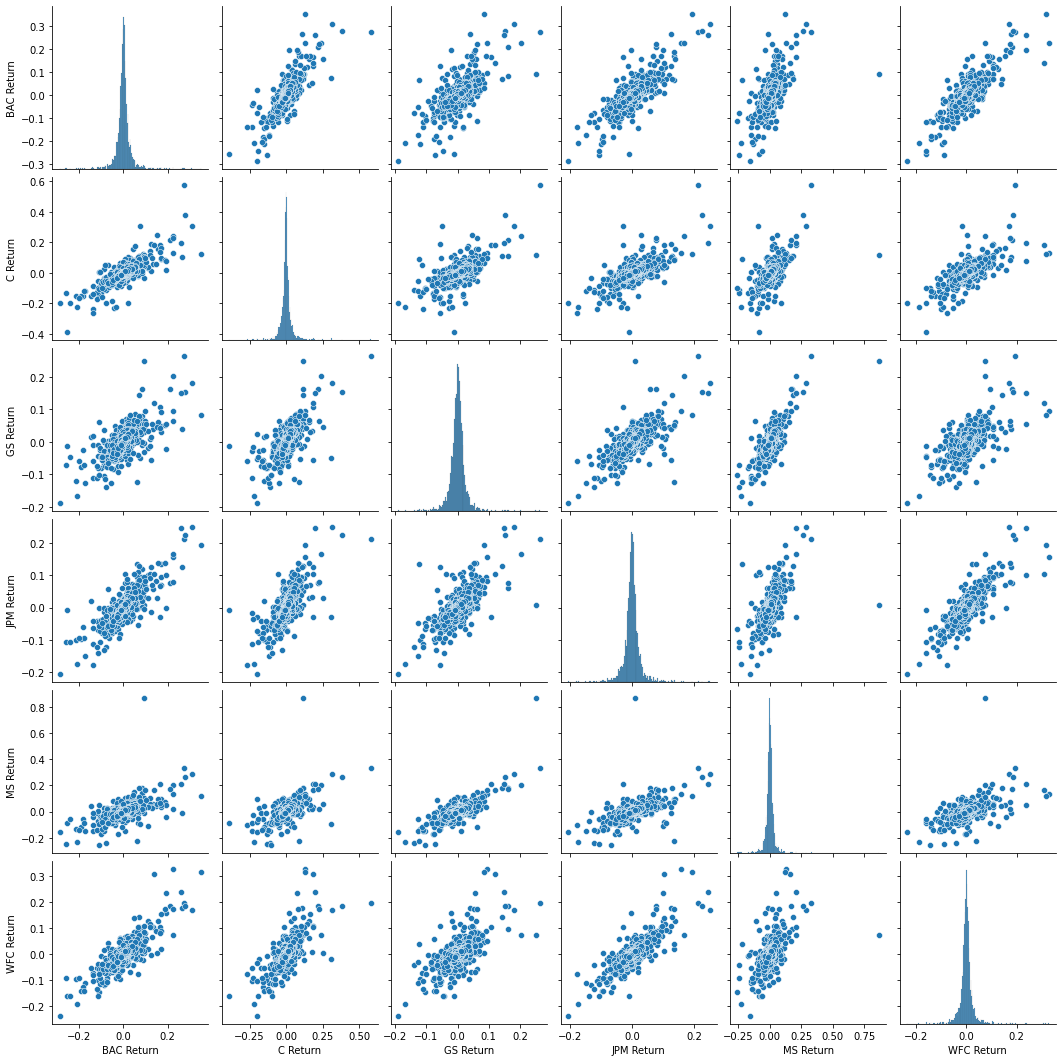

In [ ]:
sns.pairplot(data = returns[1:])

**Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that a few of the banks share the same day for the worst drop, did anything significant happen that day?**

In [ ]:
returns.idxmax()

BAC Return    2009-04-09
C Return      2008-11-24
GS Return     2008-11-24
JPM Return    2009-01-21
MS Return     2008-10-13
WFC Return    2008-07-16
dtype: object

**You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anything significant happen in that time frame?**

**Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [ ]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

**Create a distplot using seaborn of the 2015 returns for Morgan Stanley**

**Create a distplot using seaborn of the 2008 returns for CitiGroup**

____
# More Visualization

Feel free to use any of your preferred visualization libraries to try to recreate the described plot below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

**Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

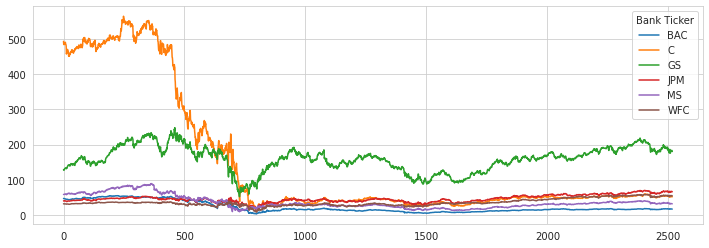

In [ ]:
bank_stocks.xs('Close', level='Stock Info', axis = 1).plot(figsize=(12,4),label=tick)

# Great Job!

Definitely a good job if you were able to do all of them, but don't worry if you didn't understand them all, Remember practice makes anyone perfect😎!